In [1]:
## read features:
import numpy as np
import pandas as pd

base_dir = "C:/Users/Xin/Dropbox/BrainImaging_ML/"
# base_dir = "/home/xin/Dropbox/BrainImaging_ML/"

data_dir = base_dir + "data"
atlas_dir = base_dir + "Atlas_label"
work_dir= base_dir + "multidimensional_age_prediction/"

# ransac/huber with spm8 vbm features:
result_dir = work_dir + "out01_robustreg_behav_hc2_stdz_age_reverse_fa"
hc_column = 'mental_hc2'

# result_dir = work_dir + "result_robustreg_behav_hc3_stdz_age_reverse_fa"
# hc_column = 'mental_hc3'

import os
from os import path
#trying to make directory if it does not already exist:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)


# vbm analysis of cat12, 856 subjects. 
#It contains subjects in the ptsd group. So we need to remove them in training stage.
# cat_vbm = pd.read_csv(data_dir+"/ROI_catROI_neuromorphometrics_Vgm.csv", delimiter = ",")
# drop features with all zero values:
# cat_vbm.drop(columns = ['lInfLatVen', 'lOC'], inplace = True)
# print("cat_vbm:")
# print(cat_vbm.shape)
# # print(cat_vbm[:5])
# vbm = cat_vbm

spm_vbm_aal = pd.read_csv(data_dir+"/GMV_AAL_AvgExtract.csv", delimiter = ",")
# rename the subject id:
spm_vbm_aal.iloc[:,0].replace(to_replace=\
                              r'/home/xin/BrainImaging2016/Gender/Result03_Nifti_T1/VBM8/resampled_img/rm0wp1',
                              value='', regex=True, inplace = True)

spm_vbm_aal.iloc[:,0].replace(to_replace=\
                              r'.nii.gz',
                              value='', regex=True, inplace = True)

spm_vbm_aal.rename(columns = {'Unnamed: 0':'names'}, inplace = True) 
spm_vbm_aal['names']=spm_vbm_aal['names'].astype('int64')
# spm_vbm_aal.iloc[:,1:] = spm_vbm_aal.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

# read roi labels for aal atlas:
aal_label = pd.read_csv(atlas_dir+"/AAL_116_Label.csv", delimiter = ',')
spm_vbm_aal.columns = ['names'] + aal_label['ROIname'].to_list()
vbm = spm_vbm_aal


## read label FA features:
label_fa = pd.read_csv(data_dir+"/WMlabelResults_FA_all.csv", index_col=[0])
label_fa = label_fa.drop(['Unnamed: 0.1'], axis = 1)

# remove the last column which is empty.
num_col_fa=len(label_fa.columns) 
label_fa=label_fa.iloc[:,:num_col_fa-1]

# add 'label' to column names to avoid duplication with tract features:
label_fa.columns = [str(col) + '(label)' for col in label_fa.columns]

print("label fa:")
print(label_fa.shape)

## read tract FA features:
tract_fa = pd.read_csv(data_dir+"/WMtractResults_FA_all.csv", index_col=0)
tract_fa = tract_fa.drop(['Unnamed: 0.1'], axis = 1)
# remove the last column which is empty.
num_col_fa=len(tract_fa.columns) 
tract_fa=tract_fa.iloc[:,:num_col_fa-1]

# add 'tract' to column names to avoid duplication with label features:
tract_fa.columns = [str(col) + '(tract)' for col in tract_fa.columns]

print("tract fa:")
print(tract_fa.shape)
# print(tract_fa[:5])


# reverse FA as it has oppsite developmental trend:
multimodal_features = pd.concat([vbm, label_fa*-1, tract_fa*-1], axis = 1,)
subject_id = vbm['names'].to_frame()


label fa:
(856, 50)
tract fa:
(856, 20)


In [2]:
multimodal_features

,names,Left Precentral,Right Precentral,Left Superior Frontal,Right Superior Frontal,Left Superior Frontal Orbital,Right Superior Frontal Orbital,Left Middle Frontal,Right Middle Frontal,Left Middle Frontal Orbital,...,Inferior.fronto-occipital.fasciculus.L(tract),Inferior.fronto-occipital.fasciculus.R(tract),Inferior.longitudinal.fasciculus.L(tract),Inferior.longitudinal.fasciculus.R(tract),Superior.longitudinal.fasciculus.L(tract),Superior.longitudinal.fasciculus.R(tract),Uncinate.fasciculus.L(tract),Uncinate.fasciculus.R(tract),Superior.longitudinal.fasciculus.(temporal.part).L(tract),Superior.longitudinal.fasciculus.(temporal.part).R(tract)
0,600009963128,0.496769,0.492516,0.469744,0.472897,0.555330,0.493855,0.550180,0.543140,0.582114,...,-0.437456,-0.442969,-0.443267,-0.447236,-0.399598,-0.394770,-0.413367,-0.385123,-0.519501,-0.596944
1,600018902293,0.449852,0.416304,0.409503,0.405678,0.480874,0.478561,0.512227,0.462751,0.564870,...,-0.443793,-0.448819,-0.438059,-0.448119,-0.392592,-0.380979,-0.414354,-0.396836,-0.497867,-0.530693
2,600020927179,0.482640,0.467225,0.447501,0.447274,0.517700,0.506424,0.501372,0.497672,0.542297,...,-0.424441,-0.439973,-0.428178,-0.449536,-0.380261,-0.397040,-0.383116,-0.360416,-0.445371,-0.552623
3,600038720566,0.537039,0.500568,0.393680,0.396776,0.462140,0.494675,0.508237,0.509624,0.541629,...,-0.397274,-0.414276,-0.413616,-0.455565,-0.350093,-0.363446,-0.345775,-0.363318,-0.448154,-0.506131
4,600039015048,0.492985,0.456270,0.445612,0.430054,0.530365,0.498957,0.532549,0.497623,0.644824,...,-0.403416,-0.412354,-0.398910,-0.429717,-0.341277,-0.351933,-0.370439,-0.349578,-0.464686,-0.477383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,609952290400,0.509341,0.475429,0.510728,0.475471,0.507305,0.502461,0.562187,0.532146,0.517031,...,-0.417074,-0.421442,-0.418291,-0.434320,-0.362560,-0.364162,-0.383884,-0.384778,-0.430581,-0.446671
852,609987242768,0.457030,0.453794,0.409719,0.428935,0.434518,0.419687,0.507162,0.477671,0.496427,...,-0.428157,-0.432437,-0.419059,-0.426469,-0.358725,-0.364376,-0.391776,-0.358318,-0.449291,-0.454821
853,609987705265,0.546239,0.524109,0.491601,0.512870,0.509529,0.466537,0.618745,0.575515,0.528518,...,-0.448732,-0.442193,-0.430518,-0.454093,-0.400408,-0.407545,-0.402627,-0.384856,-0.471331,-0.539863
854,609989574966,0.533730,0.481235,0.451251,0.410076,0.554846,0.496971,0.570939,0.545644,0.540538,...,-0.415002,-0.420682,-0.410579,-0.437477,-0.360279,-0.367186,-0.380419,-0.354574,-0.474905,-0.544152


In [3]:
cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]
cog_label_acc2 = [s + '_Accuracy' for s in cog_label_acc2]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]
cog_label_speed2 = [s + '_Speed' for s in cog_label_speed2]

cog_score_label = cog_label_acc + cog_label_speed
cog_score_label2 = cog_label_acc2 + cog_label_speed2
num_cog = len(cog_score_label)


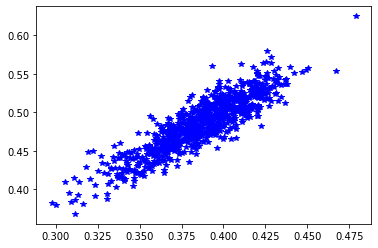

In [4]:
import matplotlib.pyplot as plt

plt.plot(label_fa.iloc[:,35], tract_fa.iloc[:,4], 'b*')

In [5]:
# read subject_info:
# pnc_subject_info = pd.read_csv(data_dir+"/pnc_subject_info.csv", delimiter = ",")
# pnc_subject_info = pnc_subject_info[['SUBJID', 'Sex', 'age_at_cnb']]

# select mental healthy subjects:
behav_data = pd.read_csv(data_dir+"/pyresult01_pnc_behav_mental4.csv", delimiter = ",")
behav_data = behav_data.astype({'SUBJID': 'int64'})
behav_data["Med_Rating"] = behav_data["Med_Rating"].apply(pd.to_numeric, errors='coerce')
behav_data = behav_data.loc[behav_data["Med_Rating"]<2,:]



## without adding behavioral data:
behav_data_hc = behav_data.loc[behav_data[hc_column]==True, ['SUBJID', 'Sex', 'age_at_cnb']]
behav_data_all = behav_data.loc[:, ['SUBJID', 'Sex', 'age_at_cnb']]


behav_feature = behav_data_hc.merge(multimodal_features, how = "inner", 
                                            right_on = "names", left_on = "SUBJID")

behav_feature_all = behav_data_all.merge(multimodal_features, how = "inner", 
                                            right_on = "names", left_on = "SUBJID")


print(behav_feature['age_at_cnb'].max())
print(behav_feature['age_at_cnb'].min())
print(behav_feature['age_at_cnb'].mean())
print(behav_feature['age_at_cnb'].std())
print(behav_feature.loc[behav_feature['Sex']=='F',:].shape)

behav_feature.to_csv(result_dir+'/out01_behav_feature_hc_raw.csv')
behav_feature_all.to_csv(result_dir+'/out01_behav_feature_all_raw.csv')


# add behavioral data:
behav_data_cog_hc = behav_data.loc[behav_data[hc_column]==True, ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label]
behav_data_cog_hc.columns = ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label2

behav_cog_feature = behav_data_cog_hc.merge(multimodal_features['names'], how = "inner", 
                                            right_on = "names", left_on = "SUBJID")

behav_cog_feature_all = behav_data_cog_hc.merge(multimodal_features['names'], how = "inner", 
                                            right_on = "names", left_on = "SUBJID")

behav_cog_feature.to_csv(result_dir+'/out01_behav_cog_hc_raw.csv')
behav_cog_feature_all.to_csv(result_dir+'/out01_behav_cog_all_raw.csv')

21.0
8.0
14.506024096385541
3.7943290826303704
(82, 190)


In [6]:

def behav_feature_preprocessing( behav_feature ):
    # reverse speed scores:
    #behav_feature.loc[:,cog_label_speed2] = behav_feature.loc[:,cog_label_speed2]*-1

    #subject_info_feature['Sex'] = subject_info_feature['Sex'].apply({'F':0, 'M':1}.get)
    # code females as -1 for easy interpretation of beta for age and age2
    behav_feature['Sex'] = behav_feature['Sex'].apply({'F':-1, 'M':1}.get)

    # check merge
    print(behav_feature.loc[:,['SUBJID', 'names']])
    behav_feature.drop(['names'], axis=1, inplace = True)
    # subject_info_feature.drop(['SUBJID'], axis=1, inplace = True)

    #normalize the brain imaging feature columns:
    behav_feature.iloc[:,3:] = (behav_feature.iloc[:,3:] - behav_feature.iloc[:,3:].min()) / \
                            (behav_feature.iloc[:,3:].max() - behav_feature.iloc[:,3:].min())
    
    return(behav_feature)


behav_feature = behav_feature_preprocessing(behav_feature)


           SUBJID         names
0    600009963128  600009963128
1    600039015048  600039015048
2    600110937794  600110937794
3    600173623767  600173623767
4    600294591042  600294591042
..            ...           ...
161  609706993828  609706993828
162  609714765360  609714765360
163  609728145608  609728145608
164  609802779962  609802779962
165  609987705265  609987705265

[166 rows x 2 columns]


In [7]:
behav_feature.iloc[:,2:]

,age_at_cnb,Left Precentral,Right Precentral,Left Superior Frontal,Right Superior Frontal,Left Superior Frontal Orbital,Right Superior Frontal Orbital,Left Middle Frontal,Right Middle Frontal,Left Middle Frontal Orbital,...,Inferior.fronto-occipital.fasciculus.L(tract),Inferior.fronto-occipital.fasciculus.R(tract),Inferior.longitudinal.fasciculus.L(tract),Inferior.longitudinal.fasciculus.R(tract),Superior.longitudinal.fasciculus.L(tract),Superior.longitudinal.fasciculus.R(tract),Uncinate.fasciculus.L(tract),Uncinate.fasciculus.R(tract),Superior.longitudinal.fasciculus.(temporal.part).L(tract),Superior.longitudinal.fasciculus.(temporal.part).R(tract)
0,9.0,0.457416,0.586698,0.616192,0.576828,0.561142,0.624325,0.504788,0.598658,0.427009,...,0.317944,0.299679,0.268946,0.390544,0.177145,0.327688,0.325868,0.381189,0.210360,0.095711
1,11.0,0.439378,0.384520,0.494422,0.393577,0.461406,0.642540,0.441178,0.420646,0.603231,...,0.664640,0.610548,0.690892,0.547483,0.750211,0.703807,0.652208,0.700013,0.486317,0.705825
2,10.0,0.534610,0.907624,0.844301,0.800059,0.712411,0.773453,0.871150,1.000000,0.509148,...,0.426750,0.539337,0.549013,0.414220,0.669795,0.694175,0.558604,0.619412,0.454832,0.625316
3,16.0,0.122655,0.190124,0.448518,0.507584,0.339584,0.542403,0.352347,0.388202,0.241271,...,0.460401,0.510916,0.495039,0.450241,0.212135,0.474493,0.591156,0.446263,0.459982,0.602240
4,12.0,0.618787,0.480667,0.523850,0.337763,0.809527,0.706665,0.788467,0.533119,0.553866,...,0.349599,0.266414,0.306996,0.178807,0.209531,0.359604,0.352833,0.269060,0.089143,0.153206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,10.0,0.962285,0.557492,0.785959,0.496664,0.880763,0.816513,0.800264,0.662949,0.858730,...,0.404048,0.510185,0.485337,0.393025,0.438675,0.354186,0.670050,0.683553,0.522438,0.482086
162,13.0,0.462878,0.480327,0.314779,0.277997,0.336304,0.529551,0.518223,0.402558,0.257890,...,0.262212,0.265835,0.350820,0.402315,0.548010,0.301347,0.547277,0.411067,0.636818,0.262088
163,18.0,0.532903,0.568530,0.251906,0.601880,0.119289,0.616514,0.323112,0.370505,0.346294,...,0.448810,0.464643,0.481712,0.467065,0.339805,0.188328,0.663231,0.611573,0.620990,0.397714
164,16.0,0.093621,0.219213,0.367601,0.335488,0.242512,0.547898,0.180059,0.213237,0.258289,...,0.306873,0.232794,0.328152,0.325722,0.283600,0.422427,0.440529,0.268791,0.465006,0.783446


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# scaler = MinMaxScaler()
scaler = RobustScaler()

# count number of NaNs:
# row_nancount = subject_info_feature.isna().sum()
# subject_info_feature = subject_info_feature.loc[:, subject_info_feature.isna().sum()==0]

# # center age at sample mean:
# behav_feature['age_at_cnb']=behav_feature['age_at_cnb']-behav_feature['age_at_cnb'].mean()

# standardize age at sample mean:
behav_feature['age_at_cnb']= (behav_feature['age_at_cnb']-behav_feature['age_at_cnb'].mean())/behav_feature['age_at_cnb'].std()
scaler.fit(behav_feature.iloc[:,3:].values)
behav_feature.iloc[:,3:] = scaler.transform(behav_feature.iloc[:,3:].values)

behav_feature.to_csv(result_dir+'/out01_behav_feature_hc.csv')
behav_feature

,SUBJID,Sex,age_at_cnb,Left Precentral,Right Precentral,Left Superior Frontal,Right Superior Frontal,Left Superior Frontal Orbital,Right Superior Frontal Orbital,Left Middle Frontal,...,Inferior.fronto-occipital.fasciculus.L(tract),Inferior.fronto-occipital.fasciculus.R(tract),Inferior.longitudinal.fasciculus.L(tract),Inferior.longitudinal.fasciculus.R(tract),Superior.longitudinal.fasciculus.L(tract),Superior.longitudinal.fasciculus.R(tract),Uncinate.fasciculus.L(tract),Uncinate.fasciculus.R(tract),Superior.longitudinal.fasciculus.(temporal.part).L(tract),Superior.longitudinal.fasciculus.(temporal.part).R(tract)
0,600009963128,-1,-1.451119,0.126580,0.429574,0.409832,0.656431,0.635182,0.244428,0.188765,...,-0.462763,-0.705226,-0.908993,-0.162963,-1.013584,-0.408716,-1.014087,-0.446338,-1.381280,-1.360642
1,600039015048,1,-0.924017,0.062110,-0.338611,-0.002323,-0.068391,0.286075,0.321048,-0.027789,...,0.835284,0.609103,0.929677,0.397932,1.248257,1.028972,0.477271,0.814648,-0.163480,0.737923
2,600110937794,-1,-1.187568,0.402484,1.648949,1.181915,1.539387,1.164667,0.871715,1.436022,...,-0.055388,0.308029,0.311426,-0.078344,0.930860,0.992155,0.049506,0.495863,-0.302423,0.461001
3,600173623767,1,0.393739,-1.069909,-1.077230,-0.157692,0.382544,-0.140335,-0.100168,-0.330210,...,0.070603,0.187866,0.076230,0.050394,-0.875479,0.152438,0.198266,-0.188962,-0.279695,0.381630
4,600294591042,-1,-0.660466,0.703348,0.026704,0.097283,-0.289156,1.504601,0.590780,1.154530,...,-0.344246,-0.845867,-0.743186,-0.919703,-0.885756,-0.286719,-0.890861,-0.889821,-1.916210,-1.162880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,609706993828,1,-1.187568,1.931067,0.318604,0.984445,0.339352,1.753947,1.052843,1.194694,...,-0.140387,0.184775,0.033949,-0.154095,0.018654,-0.307426,0.558808,0.749550,-0.004077,-0.031655
162,609714765360,1,-0.396914,0.146105,0.025411,-0.610359,-0.525553,-0.151816,-0.154231,0.234505,...,-0.671427,-0.848314,-0.552219,-0.120894,0.450189,-0.509402,-0.002258,-0.328169,0.500683,-0.788368
163,609728145608,1,0.920842,0.396385,0.360546,-0.823166,0.755521,-0.911433,0.211569,-0.429736,...,0.027208,-0.007770,0.018156,0.110521,-0.371576,-0.941409,0.527645,0.464857,0.430834,-0.321864
164,609802779962,-1,0.393739,-1.173684,-0.966705,-0.431574,-0.298156,-0.480115,-0.077056,-0.916752,...,-0.504214,-0.988012,-0.650998,-0.394634,-0.593413,-0.046584,-0.490090,-0.890885,-0.257523,1.004910


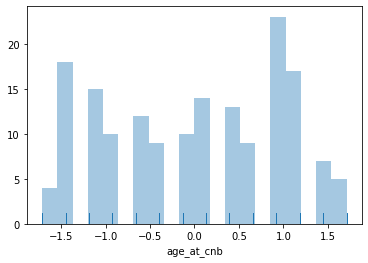

In [9]:
import seaborn as sns

sns.distplot(behav_feature['age_at_cnb'], kde=False, rug=True, bins = 20)

In [10]:
# prepare reuslt file for regression anlaysis:

features_keys = pd.concat([behav_data_hc.iloc[:, 3:], vbm.drop(['names'], axis=1), label_fa, tract_fa], axis = 1,
                             keys = ['behav', 'gmv', 'label_fa', 'tract_fa'])

features_keys = features_keys.columns.get_level_values(0)
features_keys

feature_beta_df = pd.DataFrame(index = behav_feature.columns[3:], 
                               columns = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender', 'Rsquare', 'RsquareMedian'])

feature_beta_df.insert(0, 'modality', features_keys)

feature_p_df = pd.DataFrame(index = behav_feature.columns[3:], 
                            columns = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'])
feature_p_df.insert(0, 'modality', features_keys)


Rsquare_col = feature_beta_df.shape[1]

In [11]:
feature_beta_df.to_csv(result_dir + '/out01_robust_regression_coefs_empty.csv')
feature_p_df.to_csv(result_dir + '/out01_robust_regression_pvalue_empty.csv')